In [1]:
%run ../scripts/notebook_settings_lean.py
import zarr
import allel
from horizonplot import horizonplot

In [2]:
meta_data_samples = pd.read_csv("../data/Papio_metadata_with_clustering.txt", sep =" ")
meta_data_samples_Sci = meta_data_samples.copy()
for i, row in meta_data_samples_Sci.iterrows():
    if row.PGDP_ID[0] != "P":
        meta_data_samples_Sci.at[i, "PGDP_ID"] = "Sci_"+str(row.PGDP_ID)
os.makedirs("../figures/misc_plots/", exist_ok=True)

In [3]:
meta_data_samples.PGDP_ID[:5]

0    16066
1    16098
2    30877
3    30977
4    34449
Name: PGDP_ID, dtype: object

In [4]:
meta_data_samples.loc[meta_data_samples.Origin == "Lake Manyara, Tanzania"]

,PGDP_ID,Provider_ID,Provider,Genus,Species,Origin,Sex,address,longitude,latitude,callset_index,C_origin
49,PD_0238,19LMF8280815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,49,"Anubis, Tanzania"
50,PD_0239,20LMF5280815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,50,"Anubis, Tanzania"
51,PD_0240,21LMF2290815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,51,"Anubis, Tanzania"
52,PD_0241,22LMF5290815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,52,"Anubis, Tanzania"
53,PD_0242,23LMM1081215,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",M,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,53,"Anubis, Tanzania"
76,PD_0492,1 / 30LMF5190416,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,76,"Anubis, Tanzania"
106,PD_0674,102 / 04LMF8160815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,106,"Anubis, Tanzania"
107,PD_0675,103 / 06LMF5170815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,107,"Anubis, Tanzania"
108,PD_0676,104 / 07LMF5170815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,108,"Anubis, Tanzania"
109,PD_0677,105 / 11LMF5200815,Knauf/Chuma/Roos,Papio,anubis,"Lake Manyara, Tanzania",F,"Lake Manyara, Babati, Manyara, Northern Zone, ...",35.806488,-3.62221,109,"Anubis, Tanzania"


In [5]:
population = meta_data_samples.loc[meta_data_samples.PGDP_ID == "PD_0685"].\
                    iloc[0].Origin
popname = population.split(",")[0].replace(" ", "_") 
        #Picking out samples matching origin
samples = meta_data_samples.loc[meta_data_samples.Origin == population].PGDP_ID

In [6]:
samples

49     PD_0238
50     PD_0239
51     PD_0240
52     PD_0241
53     PD_0242
76     PD_0492
106    PD_0674
107    PD_0675
108    PD_0676
109    PD_0677
110    PD_0678
111    PD_0679
112    PD_0680
113    PD_0681
114    PD_0682
115    PD_0683
116    PD_0684
117    PD_0685
118    PD_0686
Name: PGDP_ID, dtype: object

In [7]:
{','.join(list(samples))}

{'PD_0238,PD_0239,PD_0240,PD_0241,PD_0242,PD_0492,PD_0674,PD_0675,PD_0676,PD_0677,PD_0678,PD_0679,PD_0680,PD_0681,PD_0682,PD_0683,PD_0684,PD_0685,PD_0686'}

In [8]:
zarr_dir = "/faststorage/project/baboondiversity/data/PG_panu3_zarr_12_03_2021/callset.zarr/chrX"
#Opening the zarr data
callset = zarr.open_group(zarr_dir, mode="r")
gt = allel.GenotypeArray(callset["calldata/GT"])
pos = callset["variants/POS"][:]

In [9]:
gt

<GenotypeArray shape=(2923212, 227, 2) dtype=int8>
1/1 1/1 0/0 ./. 0/0 ... 0/0 0/0 ./. 0/1 0/1
1/1 0/1 0/0 ./. 0/0 ... 0/0 0/0 ./. 0/1 0/1
0/1 0/0 0/0 1/1 0/0 ... 0/1 0/0 0/1 0/0 0/0
...
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
0/0 0/0 0/0 0/0 0/0 ... 0/0 0/0 0/0 0/0 0/0
./. 1/1 0/1 1/1 1/1 ... 1/1 1/1 ./. 1/1 1/1

In [10]:
pos

array([       37,        57,       157, ..., 143691548, 143691549,
       143691566], dtype=int32)

Checking number of IDs

In [11]:
meta_data_samples.Origin.value_counts()

Origin
Mikumi, Tanzania                         38
Chunga, Zambia                           27
Gog Woreda, Gambella region, Ethiopia    25
Filoha, Ethiopia                         24
Lake Manyara, Tanzania                   19
Gombe, Tanzania                          17
Serengeti, Tanzania                      14
Niokolo-Koba, Senegal                    12
Mahale, Tanzania                          7
Tarangire, Tanzania                       7
Ngorongoro, Tanzania                      6
Ruaha, Tanzania                           6
Udzungwa, Tanzania                        5
Arusha, Tanzania                          4
Dendro Park, Zambia                       4
Selous, Tanzania                          3
captive                                   2
Awash, Ethiopia                           2
Aberdare, Kenya                           2
Katavi, Tanzania                          2
Issa Valley, Tanzania                     1
Name: count, dtype: int64

In [12]:
mikumi_index = meta_data_samples.loc[(meta_data_samples.Origin == "Mikumi, Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index
mikumi_gt = gt.take(mikumi_index, axis=1)

In [13]:
ruaha_index = meta_data_samples.loc[(meta_data_samples.Origin == "Ruaha, Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index
ruaha_gt = gt.take(ruaha_index, axis=1)

In [14]:
manyara_index = meta_data_samples.loc[(meta_data_samples.Origin == "Lake Manyara, Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index
manyara_gt = gt.take(manyara_index, axis=1)

In [15]:
filoha_index = meta_data_samples.loc[(meta_data_samples.Origin == "Filoha, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index
filoha_gt = gt.take(filoha_index, axis=1)

In [16]:
gog_index = meta_data_samples.loc[(meta_data_samples.Origin == "Gog Woreda, Gambella region, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index
gog_gt = gt.take(gog_index, axis=1)

Calculating diversity

In [17]:
window_size = int(1000000)

In [18]:
mikumi_gt.to_allele_counts()

<GenotypeAlleleCountsArray shape=(2923212, 13, 5) dtype=uint8>
0:2:0:0:0 0:2:0:0:0 0:0:0:0:0 1:1:0:0:0 2:0:0:0:0 ... 0:2:0:0:0 1:1:0:0:0 0:2:0:0:0 1:1:0:0:0 0:0:0:0:0
0:2:0:0:0 1:1:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 ... 2:0:0:0:0 2:0:0:0:0 0:2:0:0:0 1:1:0:0:0 2:0:0:0:0
1:1:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 ... 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0
...
2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 ... 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0
2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 ... 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0 2:0:0:0:0
0:0:0:0:0 0:2:0:0:0 0:2:0:0:0 0:2:0:0:0 0:2:0:0:0 ... 0:2:0:0:0 0:2:0:0:0 0:2:0:0:0 0:2:0:0:0 0:2:0:0:0

In [19]:
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac=mikumi_gt.count_alleles(), size=window_size)
mikumi_df = pd.DataFrame({"pi": pi, "chrom": "chrX", "pop_id": "Mikumi", "start": list(range(len(pi)))})

In [20]:
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac=ruaha_gt.count_alleles(), size=window_size)
ruaha_df = pd.DataFrame({"pi": pi, "chrom": "chrX", "pop_id": "Ruaha", "start": list(range(len(pi)))})

In [21]:
pi, windows, n_bases, counts = allel.windowed_diversity(pos, ac=manyara_gt.count_alleles(), size=window_size)
manyara_df = pd.DataFrame({"pi": pi, "chrom": "chrX", "pop_id": "Manyara", "start": list(range(len(pi)))})

In [22]:
concat_df = pd.concat([mikumi_df, ruaha_df, manyara_df])

In [23]:
concat_df

,pi,chrom,pop_id,start
0,0.001761,chrX,Mikumi,0
1,0.001616,chrX,Mikumi,1
2,0.001963,chrX,Mikumi,2
3,0.001558,chrX,Mikumi,3
4,0.001304,chrX,Mikumi,4
...,...,...,...,...
139,0.000503,chrX,Manyara,139
140,0.000586,chrX,Manyara,140
141,0.000945,chrX,Manyara,141
142,0.000664,chrX,Manyara,142


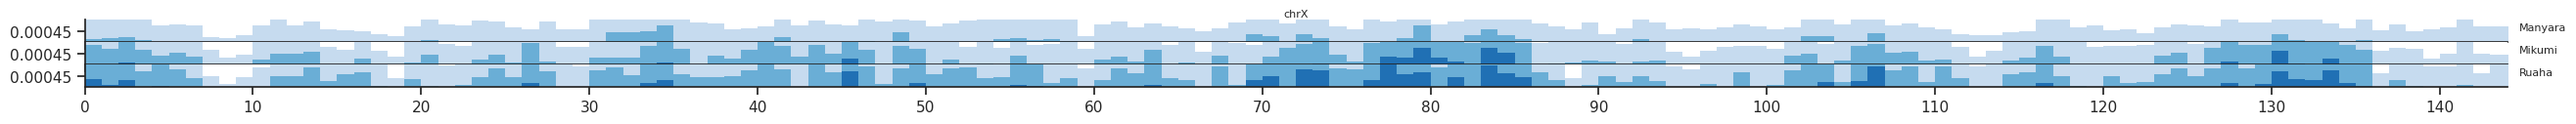

In [24]:
fig = horizonplot(concat_df, 'pi', width=2, col='chrom', row='pop_id', size=0.3, aspect=100)
fig.savefig("../figures/misc_plots/diversity_mikumi_ruaha.pdf", dpi=300, format="pdf")

Calculating Fst

In [25]:
def fst(ac1, ac2):
    num, den = allel.hudson_fst(ac1, ac2, fill=0)
    return np.sum(num) / np.sum(den)

In [26]:
out, windows, counts = allel.windowed_statistic(pos, (mikumi_gt.count_alleles(), ruaha_gt.count_alleles()), fst, size=window_size)
fst_df_mr = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Mi-Ru_Fst", "start": list(range(len(out)))})

In [27]:
out, windows, counts = allel.windowed_statistic(pos, (manyara_gt.count_alleles(), ruaha_gt.count_alleles()), fst, size=window_size)
fst_df_rm = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Ru-Ma_Fst", "start": list(range(len(out)))})

In [28]:
out, windows, counts = allel.windowed_statistic(pos, (mikumi_gt.count_alleles(), manyara_gt.count_alleles()), fst, size=window_size)
fst_df_mm = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Mi-Ma_Fst", "start": list(range(len(out)))})

In [29]:
out, windows, counts = allel.windowed_statistic(pos, (mikumi_gt.count_alleles(), filoha_gt.count_alleles()), fst, size=window_size)
fst_df_mf = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Mi-Fi_Fst", "start": list(range(len(out)))})

In [30]:
out, windows, counts = allel.windowed_statistic(pos, (mikumi_gt.count_alleles(), gog_gt.count_alleles()), fst, size=window_size)
fst_df_mg = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "Mi-Gog_Fst", "start": list(range(len(out)))})

In [31]:
concat_df = pd.concat([fst_df_mr, fst_df_rm, fst_df_mm, fst_df_mf, fst_df_mg])

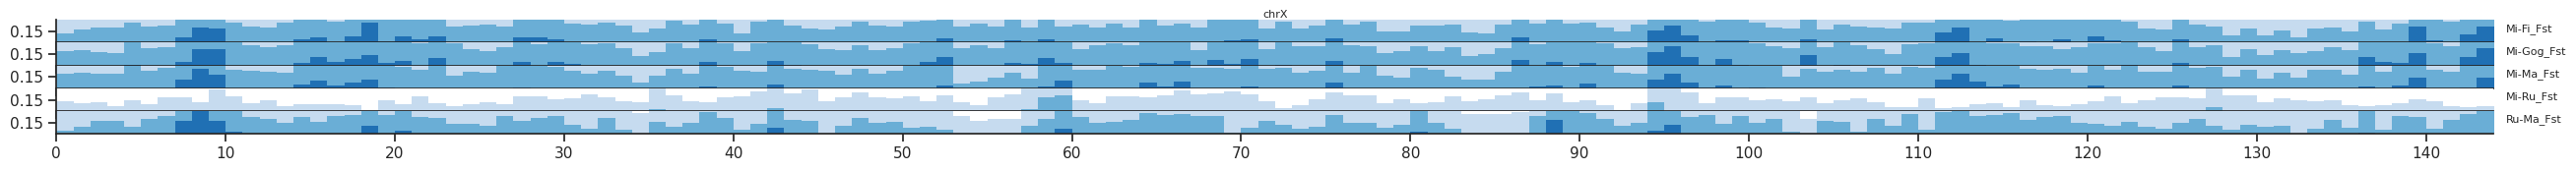

In [32]:
fig = horizonplot(concat_df, 'fst', width=2, col='chrom', row='pop_id', size=0.3, aspect=100)
fig.savefig("../figures/misc_plots/fst_mikumi_ruaha_manyara.pdf", dpi=300, format="pdf")

[(0.0, 143.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

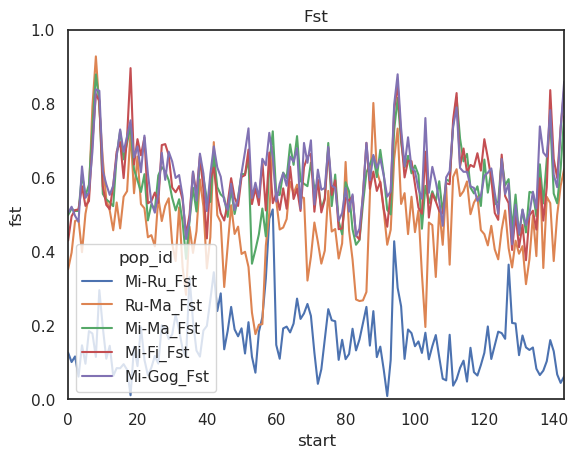

In [ ]:
g = sns.lineplot(data=concat_df, x="start", y="fst", hue="pop_id")
g.set(xlim=(0, 143), ylim=(0, 1), title="Fst")

[(0.0, 143.0),
 (0.0, 0.8),
 Text(0.5, 1.0, 'Fst between Mikumi and Ruaha on chrX')]

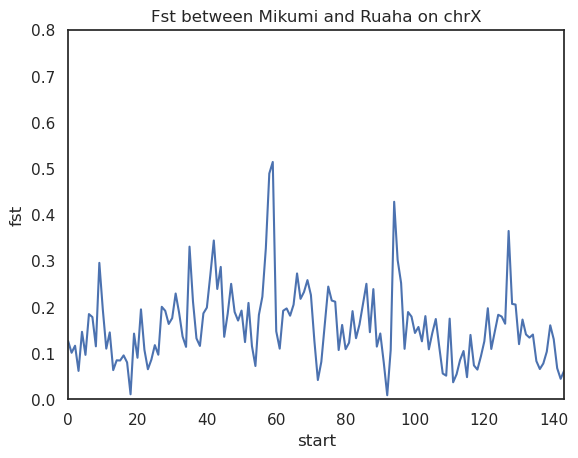

In [34]:
g = sns.lineplot(data=fst_df_mr, x="start", y="fst")
g.set(xlim=(0, 143), ylim=(0, 0.8), title="Fst between Mikumi and Ruaha on chrX")

Comparing all the Mikumi to check Fst in region of interest.

In [35]:
df_l = []
for o in meta_data_samples.Origin.unique():
    print(o)
    o_index = meta_data_samples.loc[(meta_data_samples.Origin == o) &
                                    (meta_data_samples.Sex == "F")].callset_index
    if len(o_index) > 0:
        o_gt = gt.take(o_index, axis=1)
        out, windows, counts = allel.windowed_statistic(pos, (mikumi_gt.count_alleles(), o_gt.count_alleles()), fst, size=window_size)
        fst_df = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "{}".format(o[:3]), "start": list(range(len(out)))})
        df_l.append(fst_df)
concat_df = pd.concat(df_l)

Mikumi, Tanzania
Aberdare, Kenya
Chunga, Zambia
captive
Awash, Ethiopia
Serengeti, Tanzania
Arusha, Tanzania
Ngorongoro, Tanzania
Ruaha, Tanzania
Gombe, Tanzania
Udzungwa, Tanzania
Mahale, Tanzania
Katavi, Tanzania
Selous, Tanzania
Lake Manyara, Tanzania
Tarangire, Tanzania
Niokolo-Koba, Senegal
Issa Valley, Tanzania
Dendro Park, Zambia
Filoha, Ethiopia
Gog Woreda, Gambella region, Ethiopia


In [36]:
plot_df = concat_df.loc[concat_df.pop_id.isin(["Fil", "Rua", "Chu", "Nio"])]

[(0.0, 143.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

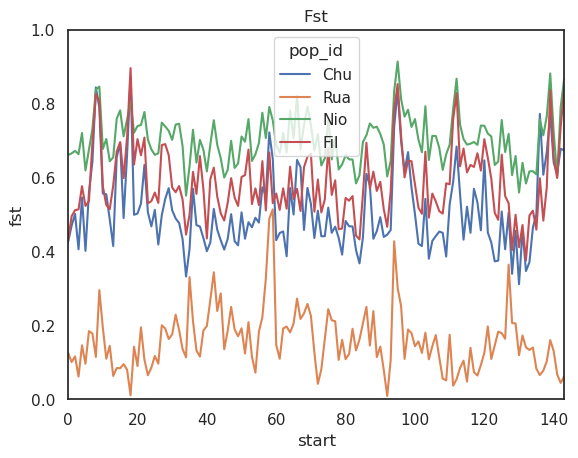

In [37]:
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_id")
g.set(xlim=(0, 143), ylim=(0, 1), title="Fst")

Checking the region around AR

In [38]:
window_size = 100000
df_l = []
for o in meta_data_samples.Origin.unique():
    print(o)
    o_index = meta_data_samples.loc[(meta_data_samples.Origin == o) &
                                    (meta_data_samples.Sex == "F")].callset_index
    if len(o_index) > 0:
        o_gt = gt.take(o_index, axis=1)
        out, windows, counts = allel.windowed_statistic(pos, (mikumi_gt.count_alleles(), o_gt.count_alleles()), fst, size=window_size)
        fst_df = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_id": "{}".format(o.split(",")[0]), "start": list(range(len(out)))})
        df_l.append(fst_df)
concat_df = pd.concat(df_l)

Mikumi, Tanzania
Aberdare, Kenya
Chunga, Zambia
captive
Awash, Ethiopia
Serengeti, Tanzania
Arusha, Tanzania
Ngorongoro, Tanzania
Ruaha, Tanzania
Gombe, Tanzania
Udzungwa, Tanzania
Mahale, Tanzania
Katavi, Tanzania
Selous, Tanzania
Lake Manyara, Tanzania
Tarangire, Tanzania
Niokolo-Koba, Senegal
Issa Valley, Tanzania
Dendro Park, Zambia
Filoha, Ethiopia
Gog Woreda, Gambella region, Ethiopia


[(540.0, 620.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

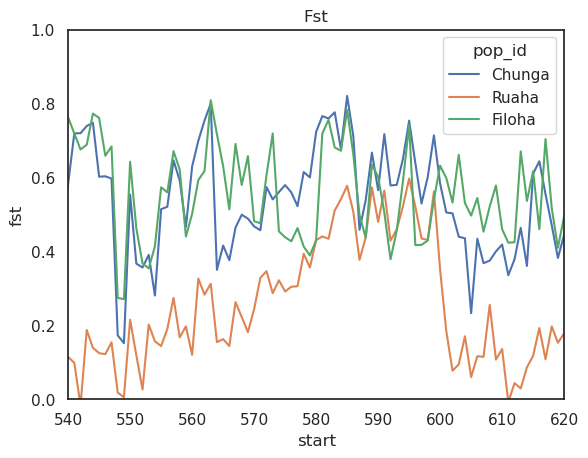

In [39]:
plot_df = concat_df.loc[concat_df.pop_id.isin(["Chunga", "Filoha", "Ruaha"])]
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_id")
g.set(xlim=(540, 620), ylim=(0, 1), title="Fst")

[(540.0, 620.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

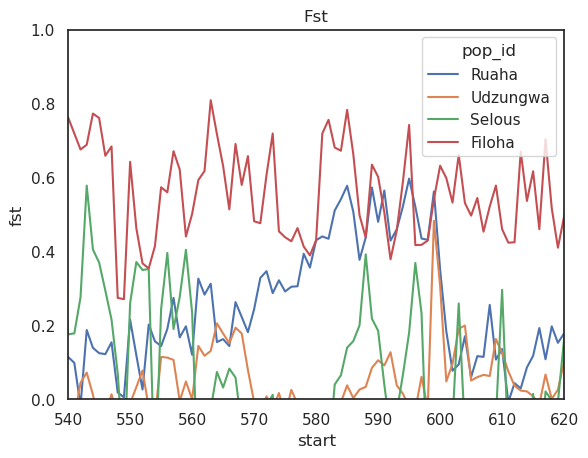

In [40]:
plot_df = concat_df.loc[concat_df.pop_id.isin(["Ruaha", "Udzungwa", "Selous", "Filoha"])]
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_id")
g.set(xlim=(540, 620), ylim=(0, 1), title="Fst")

[(660.0, 720.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

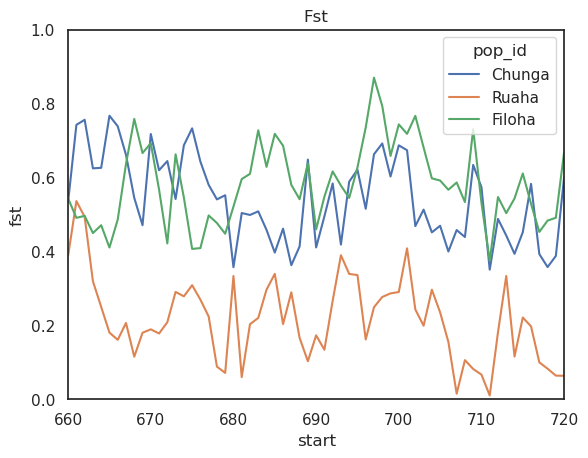

In [41]:
plot_df = concat_df.loc[concat_df.pop_id.isin(["Chunga", "Filoha", "Ruaha"])]
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_id")
g.set(xlim=(660, 720), ylim=(0, 1), title="Fst")

[(1340.0, 1400.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

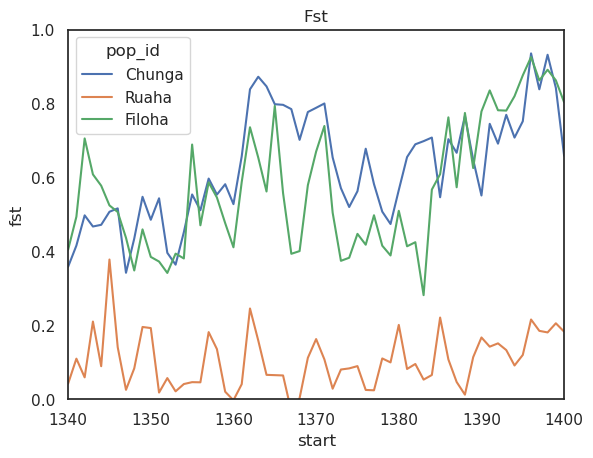

In [42]:
plot_df = concat_df.loc[concat_df.pop_id.isin(["Chunga", "Filoha", "Ruaha"])]
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_id")
g.set(xlim=(1340, 1400), ylim=(0, 1), title="Fst")

[(1400.0, 1430.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

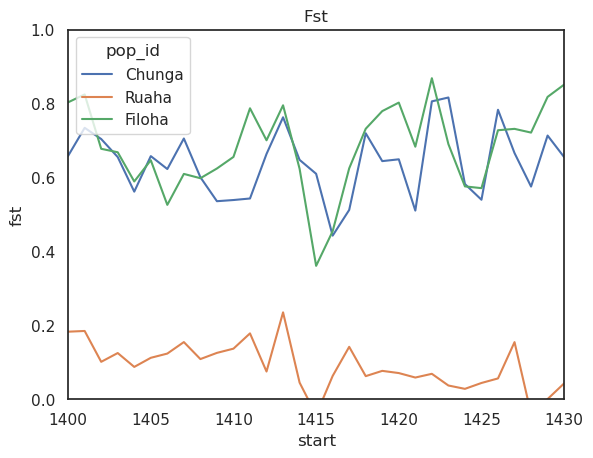

In [43]:
plot_df = concat_df.loc[concat_df.pop_id.isin(["Chunga", "Filoha", "Ruaha"])]
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_id")
g.set(xlim=(1400, 1430), ylim=(0, 1), title="Fst")

Checking the ATRX region thoroughly.

In [45]:
meta_data_samples.Origin.unique()
['Mikumi, Tanzania', 'Chunga, Zambia',
       'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Mahale, Tanzania', 'Katavi, Tanzania',
       'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania', 'Niokolo-Koba, Senegal',
       'Issa Valley, Tanzania', 'Dendro Park, Zambia', 'Filoha, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia']

array(['Mikumi, Tanzania', 'Aberdare, Kenya', 'Chunga, Zambia', 'captive',
       'Awash, Ethiopia', 'Serengeti, Tanzania', 'Arusha, Tanzania',
       'Ngorongoro, Tanzania', 'Ruaha, Tanzania', 'Gombe, Tanzania',
       'Udzungwa, Tanzania', 'Mahale, Tanzania', 'Katavi, Tanzania',
       'Selous, Tanzania', 'Lake Manyara, Tanzania',
       'Tarangire, Tanzania', 'Niokolo-Koba, Senegal',
       'Issa Valley, Tanzania', 'Dendro Park, Zambia', 'Filoha, Ethiopia',
       'Gog Woreda, Gambella region, Ethiopia'], dtype=object)

In [54]:
df_l = []
for i in range(len(meta_data_samples.Origin.unique())):
    o = meta_data_samples.Origin.unique()[i]
    o_index = meta_data_samples.loc[(meta_data_samples.Origin == o) &
                                    (meta_data_samples.Sex == "F")].callset_index
    if len(o_index) > 0:
        o_gt = gt.take(o_index, axis=1)
        for o2 in meta_data_samples.Origin.unique():
            o2_index = meta_data_samples.loc[(meta_data_samples.Origin == o2) &
                                    (meta_data_samples.Sex == "F")].callset_index
            if len(o2_index) > 0:
                print(o, o2)
                o2_gt = gt.take(o2_index, axis=1)
                out, windows, counts = allel.windowed_statistic(pos, (o2_gt.count_alleles(),
                                                                      o_gt.count_alleles()),
                                                                fst, size=window_size)
                fst_df = pd.DataFrame({"fst": out, "chrom": "chrX", "pop_1": o, "pop_2": o2,
                                       "start": list(range(len(out)))})
                df_l.append(fst_df)
concat_df = pd.concat(df_l)

Mikumi, Tanzania Mikumi, Tanzania
Mikumi, Tanzania Aberdare, Kenya
Mikumi, Tanzania Chunga, Zambia
Mikumi, Tanzania Awash, Ethiopia
Mikumi, Tanzania Serengeti, Tanzania
Mikumi, Tanzania Arusha, Tanzania
Mikumi, Tanzania Ngorongoro, Tanzania
Mikumi, Tanzania Ruaha, Tanzania
Mikumi, Tanzania Gombe, Tanzania
Mikumi, Tanzania Udzungwa, Tanzania
Mikumi, Tanzania Mahale, Tanzania
Mikumi, Tanzania Selous, Tanzania
Mikumi, Tanzania Lake Manyara, Tanzania
Mikumi, Tanzania Tarangire, Tanzania
Mikumi, Tanzania Niokolo-Koba, Senegal
Mikumi, Tanzania Issa Valley, Tanzania
Mikumi, Tanzania Dendro Park, Zambia
Mikumi, Tanzania Filoha, Ethiopia
Mikumi, Tanzania Gog Woreda, Gambella region, Ethiopia
Aberdare, Kenya Mikumi, Tanzania
Aberdare, Kenya Aberdare, Kenya


/scratch/19306683/ipykernel_1065174/699083788.py:3: RuntimeWarning: invalid value encountered in scalar divide
  return np.sum(num) / np.sum(den)


Aberdare, Kenya Chunga, Zambia
Aberdare, Kenya Awash, Ethiopia
Aberdare, Kenya Serengeti, Tanzania
Aberdare, Kenya Arusha, Tanzania
Aberdare, Kenya Ngorongoro, Tanzania
Aberdare, Kenya Ruaha, Tanzania
Aberdare, Kenya Gombe, Tanzania
Aberdare, Kenya Udzungwa, Tanzania
Aberdare, Kenya Mahale, Tanzania
Aberdare, Kenya Selous, Tanzania
Aberdare, Kenya Lake Manyara, Tanzania
Aberdare, Kenya Tarangire, Tanzania
Aberdare, Kenya Niokolo-Koba, Senegal
Aberdare, Kenya Issa Valley, Tanzania
Aberdare, Kenya Dendro Park, Zambia
Aberdare, Kenya Filoha, Ethiopia
Aberdare, Kenya Gog Woreda, Gambella region, Ethiopia
Chunga, Zambia Mikumi, Tanzania
Chunga, Zambia Aberdare, Kenya
Chunga, Zambia Chunga, Zambia
Chunga, Zambia Awash, Ethiopia
Chunga, Zambia Serengeti, Tanzania
Chunga, Zambia Arusha, Tanzania
Chunga, Zambia Ngorongoro, Tanzania
Chunga, Zambia Ruaha, Tanzania
Chunga, Zambia Gombe, Tanzania
Chunga, Zambia Udzungwa, Tanzania
Chunga, Zambia Mahale, Tanzania
Chunga, Zambia Selous, Tanzania
Chung

Lake Manyara, Tanzania Issa Valley, Tanzania
Lake Manyara, Tanzania Dendro Park, Zambia
Lake Manyara, Tanzania Filoha, Ethiopia
Lake Manyara, Tanzania Gog Woreda, Gambella region, Ethiopia
Tarangire, Tanzania Mikumi, Tanzania
Tarangire, Tanzania Aberdare, Kenya
Tarangire, Tanzania Chunga, Zambia
Tarangire, Tanzania Awash, Ethiopia
Tarangire, Tanzania Serengeti, Tanzania
Tarangire, Tanzania Arusha, Tanzania
Tarangire, Tanzania Ngorongoro, Tanzania
Tarangire, Tanzania Ruaha, Tanzania
Tarangire, Tanzania Gombe, Tanzania
Tarangire, Tanzania Udzungwa, Tanzania
Tarangire, Tanzania Mahale, Tanzania
Tarangire, Tanzania Selous, Tanzania
Tarangire, Tanzania Lake Manyara, Tanzania
Tarangire, Tanzania Tarangire, Tanzania
Tarangire, Tanzania Niokolo-Koba, Senegal
Tarangire, Tanzania Issa Valley, Tanzania
Tarangire, Tanzania Dendro Park, Zambia
Tarangire, Tanzania Filoha, Ethiopia
Tarangire, Tanzania Gog Woreda, Gambella region, Ethiopia
Niokolo-Koba, Senegal Mikumi, Tanzania
Niokolo-Koba, Senegal A

In [67]:
focus_df = concat_df.loc[concat_df.pop_1.isin(["Mikumi, Tanzania"])]
plot_df = focus_df.loc[focus_df.pop_2.isin(["Chunga, Zambia", "Filoha, Ethiopia",
                                            "Ruaha, Tanzania", "Serengeti, Tanzania",
                                           "Tarangire, Tanzania", "Selous, Tanzania"])]

[(540.0, 620.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

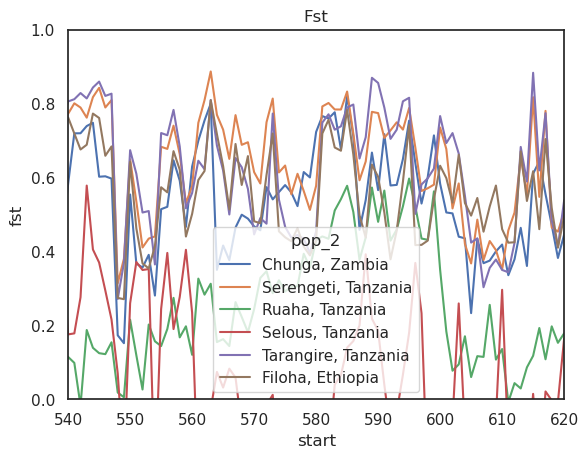

In [68]:
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_2")
g.set(xlim=(540, 620), ylim=(0, 1), title="Fst")

[(660.0, 720.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

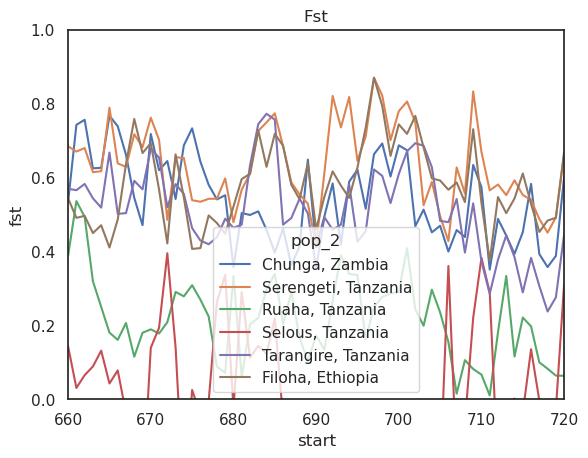

In [69]:
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_2")
g.set(xlim=(660, 720), ylim=(0, 1), title="Fst")

[(1300.0, 1400.0), (0.0, 1.0), Text(0.5, 1.0, 'Fst')]

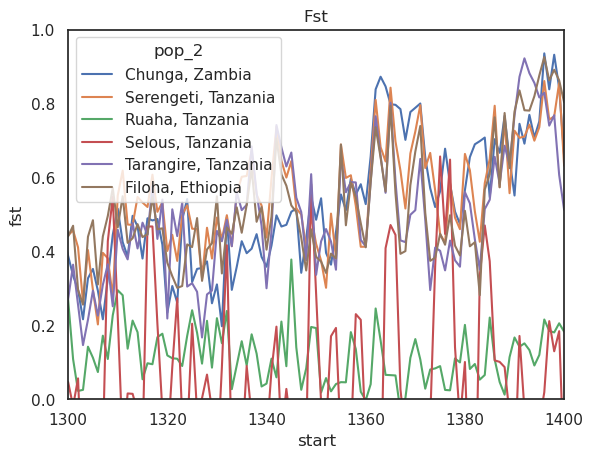

In [70]:
g = sns.lineplot(data=plot_df, x="start", y="fst", hue="pop_2")
g.set(xlim=(1300, 1400), ylim=(0, 1), title="Fst")